# Group Study Reinforcement Learning

## Multi-Armed Bandits - A single state example


* Given N different arms to choose from, each with an unknown reward, what strategy should we use to explore and learn the values of each arm, while exploiting our current knowledge to maximize profit?
* This is a very common approach for optimizing online marketing campaigns.
* This can be thought of as a single-state reinforcement learning problem


# Exploration vs Exploitation

- In the absence of a Supervisor, the agent must exlore the environment in order to gain information about rewards, while exploiting it's current information to maximize it's rewards.

- Balancing this tradeoff is a common theme

## Epsilon-greedy

- A fraction (1 - $\epsilon$) of the time, choose the arm with the largest estimated value (exploit)
- The other $\epsilon$ of the time, chose a random arm (explore)
- Tune $\epsilon$ in order to balance tradeoff



In [80]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

- Let true arm values be normally distributed with mean of 0, variance of 1
- Add a noise term to each reward, also normally distributed with mean of 0, variance of 1

## Bandit class

In [81]:
class Bandit:
    '''
    class to represent a n - armed slot machine
    each arm has value, no of times a particular arm was pulled, and its running average of reward
    '''
    def __init__(self):
        self.arm_values = np.random.normal(0,1,10) #10 random sample values from gaussian distribution
        self.K = np.zeros(10) # K = stores no of times the arm is pulled 
        self.est_values = np.zeros(10) #running avg of the reward
   
    
    def get_reward(self,action):
        noise = np.random.normal(0,1)
        if noise < self.arm_values[action]: #if arm value greater than random value, we get reward = 1
            reward = 1
        else:
            reward = 0
        return reward
    
    #action search strategy 2
    def choose_eps_greedy(self,epsilon):
        '''e greedy action search method
           if e = 0 => greedy(exploit the best arm),e =1 =>random(select any arm), for other values of e => e-greedy
           returns the arm index of the arm to be pulled 
        '''
        rand_num = np.random.random()
        if epsilon>rand_num: #explore
            return np.random.randint(10)
        else: #exploit
            return np.argmax(self.est_values)


    #action search strategy 2 => Needs to be worked on
    def softmax(self):
        '''actionsearch strategy using botlzmann approach
           returns the arm index of the arm to be pulled 
        '''
        tau = 1.12 #some random tau value
        weighted_probs = np.zeros(10)
        #calculate the weighted probability of each arm
        for i in range(10):
            softm = ( np.exp(self.est_values[i] / tau) / np.sum( np.exp(self.est_values[:] / tau) ) )
            weighted_probs[i] = softm

        return np.random.choice(range(10), p=weighted_probs)


    def update_est(self,action,reward):
        '''
        updates the K(i.e count of arm # pulled) and running avg of the arm(action)selected 
        '''
        self.K[action] += 1 #update the count
        alpha = 1./self.K[action] 
        #update the running average of rewards
        self.est_values[action] += alpha * (reward - self.est_values[action])  # keeps running average of rewards

## Lets get some money

In [82]:
bandit = Bandit()

In [83]:
print ("arm values => " + str(bandit.arm_values))
print ("K => " + str(bandit.K))
print("est_values => " + str(bandit.est_values))

arm values => [ 1.50608695  0.63910542  0.45152935 -1.234298   -0.13605638  0.85195221
 -0.8470587  -0.0870578  -0.0220476  -0.22923694]
K => [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
est_values => [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [84]:
selected_arm = bandit.choose_eps_greedy(0.3) #eps = 0.3
print(selected_arm)

4


In [85]:
reward = bandit.get_reward(selected_arm)
print(reward)

0


### updated arm values after 1 pull

In [86]:

bandit.update_est(selected_arm, reward)
print ("arm values => " + str(bandit.arm_values))
print ("K => " + str(bandit.K))
print("est_values => " + str(bandit.est_values))

arm values => [ 1.50608695  0.63910542  0.45152935 -1.234298   -0.13605638  0.85195221
 -0.8470587  -0.0870578  -0.0220476  -0.22923694]
K => [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
est_values => [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


### Lets try our luck again

In [87]:
#lets pull the arm again and see its values

selected_arm = bandit.choose_eps_greedy(0.3)
print("selected arm => " +str(selected_arm))
reward = bandit.get_reward(selected_arm)
print("reward => " +str(reward))
bandit.update_est(selected_arm,reward)
print ("arm values => " + str(bandit.arm_values))
print ("K => " + str(bandit.K))
print("est_values => " + str(bandit.est_values))

selected arm => 8
reward => 0
arm values => [ 1.50608695  0.63910542  0.45152935 -1.234298   -0.13605638  0.85195221
 -0.8470587  -0.0870578  -0.0220476  -0.22923694]
K => [ 0.  0.  0.  0.  1.  0.  0.  0.  1.  0.]
est_values => [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


# Experiment
A single experiment consists of pulling the arm Npulls times for a given 10 armed bandit.

## Epsilon greedy experiment

In [88]:
#epsilon greedy experiment

def experiment(bandit,Npulls,epsilon):
    '''
    Multi armed bandit experiment conducted using e-greedy search method
    '''
    #store the reward's collected during the conducted experiment
    history = []
    
    for i in range(Npulls):
        #step 1 : select action i.e arm #
        action = bandit.choose_eps_greedy(epsilon)
        #step 2 : calculate the reward for selecting that arm#
        R = bandit.get_reward(action)
        #step 3 : update the reward value of the arm selected 
        bandit.update_est(action,R)
        history.append(R)
        
    return np.array(history)

## Boltzmann experiment

In [89]:
#boltzmann experiment

def experiment2(bandit,Npulls):
    '''
    Multi armed bandit experiment conducted using boltzmann approach search method
    '''
    #store the reward's collected during the conducted experiment
    history = []
    for i in range(Npulls):
        #step 1 : select action i.e arm #
        action = bandit.softmax()
        #step 2 : calculate the reward for selecting that arm#
        R = bandit.get_reward(action)
        #step 3 : update the reward value of the arm selected 
        bandit.update_est(action,R)
        history.append(R)

    return np.array(history)

Repeat experiment many times and look at the evolution of the rewards, averaged over all the experiments

## Let's use our RL experiments to play slots

In [90]:

#Nexp gives the number of times we need to experiment
Nexp = 120
#each experiment consists of Npulls number of arms pulled
Npulls = 500

#variables to store avg reward of a particular experiment
avg_outcome_eps0p0 = np.zeros(Npulls) # greedy selection experiment
avg_outcome_eps0p1 = np.zeros(Npulls) # e - greedy experiment
avg_outcome_eps1 = np.zeros(Npulls) # random selection experiment
avg_outcome_boltzmann = np.zeros(Npulls)

avg_outcome_changinge = np.zeros(Npulls) # changing e selection experiment 


for i in range(Nexp):
    bandit = Bandit()
    avg_outcome_eps0p0 += experiment(bandit,Npulls,0.0)
    
    bandit = Bandit()
    avg_outcome_eps0p1 += experiment(bandit,Npulls,0.1)
    
    bandit = Bandit()
    avg_outcome_eps1 += experiment(bandit,Npulls,0.1)
    
    bandit = Bandit()
    avg_outcome_boltzmann += experiment2(bandit,Npulls)

bandit = Bandit()
for i in range(int(Nexp/4)):
    avg_outcome_changinge += experiment(bandit, Npulls, 0.20) #explore more
    
for i in range(int(Nexp/4)):
    avg_outcome_changinge += experiment(bandit, Npulls, 0.12)    

    
for i in range(int(Nexp/2)):
    avg_outcome_changinge += experiment(bandit, Npulls, 0.08) #exploit more


avg_outcome_eps0p0 /= np.float(Nexp)
avg_outcome_eps0p1 /= np.float(Nexp)
avg_outcome_eps1 /= np.float(Nexp)
avg_outcome_boltzmann /= np.float(Nexp)
avg_outcome_changinge /= np.float(Nexp)

## Plots

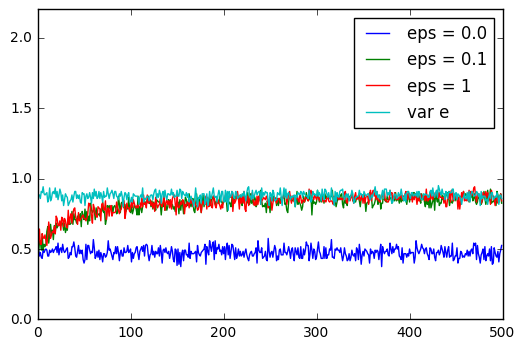

In [91]:
plt.plot(avg_outcome_eps0p0,label="eps = 0.0")
plt.plot(avg_outcome_eps0p1,label="eps = 0.1")
plt.plot(avg_outcome_eps1,label="eps = 1")
#plt.plot(avg_outcome_boltzmann,label="eps = boltzmn")
plt.plot(avg_outcome_changinge, label = "var e")


plt.ylim(0,2.2)
plt.legend()
plt.show()

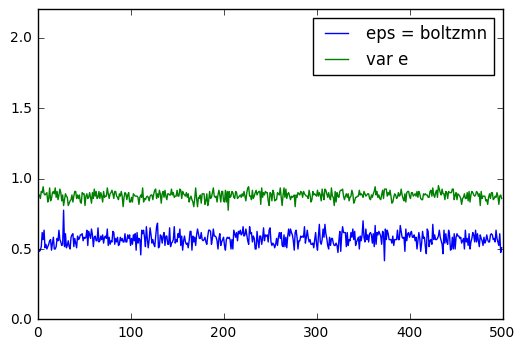

In [92]:
plt.plot(avg_outcome_boltzmann,label="eps = boltzmn")
plt.plot(avg_outcome_changinge, label = "var e")


plt.ylim(0,2.2)
plt.legend()
plt.show()

# Blackjack

In [72]:
import math
import random
#each value card has a 1:13 chance of being selected (we don't care about suits for blackjack)
#cards (value): Ace (1), 2, 3, 4, 5, 6, 7, 8, 9, 10, Jack (10), Queen (10), King (10)

def randomCard():
    card = random.randint(1,13)
    if card > 10:
        card = 10
    return card

#A hand is just a tuple e.g. (14, False), a total card value of 14 without a useable ace
#accepts a hand, if the Ace can be an 11 without busting the hand, it's useable
def useable_ace(hand):
    val, ace = hand
    return ((ace) and ((val + 10) <= 21))

def totalValue(hand):
    val, ace = hand
    if (useable_ace(hand)):
        return (val + 10)
    else:
        return val
    
def add_card(hand, card):
    val, ace = hand
    if (card == 1):
        ace = True
    return (val + card, ace)
#The first is first dealt a single card, this method finishes off his hand
def eval_dealer(dealer_hand):
    while (totalValue(dealer_hand) < 17):
        dealer_hand = add_card(dealer_hand, randomCard())
    return dealer_hand

#state: (player total, useable_ace), (dealer total, useable ace), game status; e.g. ((15, True), (9, False), 1)
#stay or hit => dec == 0 or 1
def play(state, dec):
    #evaluate
    player_hand = state[0] #val, useable ace
    dealer_hand = state[1]
    if dec == 0: #action = stay
        #evaluate game; dealer plays
        dealer_hand = eval_dealer(dealer_hand)
        
        player_tot = totalValue(player_hand)
        dealer_tot = totalValue(dealer_hand)
        status = 1
        if (dealer_tot > 21):
            status = 2 #player wins
        elif (dealer_tot == player_tot):
            status = 3 #draw
        elif (dealer_tot < player_tot):
            status = 2 #player wins
        elif (dealer_tot > player_tot):
            status = 4 #player loses
            
    elif dec == 1: #action = hit
        #if hit, add new card to player's hand
        player_hand = add_card(player_hand, randomCard())
        d_hand = eval_dealer(dealer_hand)
        player_tot = totalValue(player_hand)
        status = 1
        if (player_tot == 21): 
            if (totalValue(d_hand) == 21):
                status = 3 #draw
            else:
                status = 2 #player wins!
        elif (player_tot > 21):
            status = 4 #player loses
        elif (player_tot < 21):
            #game still in progress
            status = 1
    state = (player_hand, dealer_hand, status)

    return state

#start a game of blackjack, returns a random initial state
def initGame():
    status = 1 #1=in progress; 2=player won; 3=draw; 4 = dealer won/player loses
    player_hand = add_card((0, False), randomCard())
    player_hand = add_card(player_hand, randomCard())
    dealer_hand = add_card((0, False), randomCard())
    #evaluate if player wins from first hand
    if totalValue(player_hand) == 21:
        if totalValue(dealer_hand) != 21:
            status = 2 #player wins after first deal!
        else:
            status = 3 #draw
        
    state = (player_hand, dealer_hand, status)
    return state

### Play blackjack

In [73]:
state = initGame()
print(state)

((13, False), (8, False), 1)


## Introduce Reinforcement Learning

In [74]:
import numpy as np

#Create a list of all the possible states
def initStateSpace():
    states = []
    for card in range(1,11):
        for val in range(11,22):
            states.append((val, False, card))
            states.append((val, True, card))
    return states

#Create a dictionary (key-value pairs) of all possible state-actions and their values
#This creates our Q-value look up table
def initStateActions(states):
    av = {}
    for state in states:
        av[(state, 0)] = 0.0
        av[(state, 1)] = 0.0
    return av
#Setup a dictionary of state-actions to record how many times we've experienced
#a given state-action pair. We need this to re-calculate reward averages
def initSAcount(stateActions):
    counts = {}
    for sa in stateActions:
        counts[sa] = 0
    return counts

#This calculates the reward of the game, either +1 for winning, 0 for draw, or -1 for losing
#We can determine this by simply substracting the game status value from 3
def calcReward(outcome):
    return 3-outcome

#This recalculates the average rewards for our Q-value look-up table
def updateQtable(av_table, av_count, returns):
    for key in returns:
        av_table[key] = av_table[key] + (1.0 / av_count[key]) * (returns[key]- av_table[key])
    return av_table
        
#returns Q-value/avg rewards for each action given a state
def qsv(state, av_table):
    stay = av_table[(state,0)]
    hit = av_table[(state,1)]
    return np.array([stay, hit])

#converts a game state of the form ((player total, ace), (dealer total, ace), status) 
#to a condensed state we'll use for our RL algorithm (player total, usable ace, dealer card)
def getRLstate(state):
    player_hand, dealer_hand, status = state
    player_val, player_ace = player_hand
    return (player_val, player_ace, dealer_hand[0])

In [ ]:
epochs = 5000000 #takes just a minute or two on my Macbook Air
epsilon = 0.1

state_space = initStateSpace()
av_table = initStateActions(state_space)
av_count = initSAcount(av_table)

for i in range(epochs):
    #initialize new game; observe current state
    state = initGame()
    player_hand, dealer_hand, status = state
    #if player's total is less than 11, increase total by adding another card
    #we do this because whenever the player's total is less than 11, you always hit no matter what
    #so we don't want to waste compute cycles on that subset of the state space
    while player_hand[0] < 11:
        player_hand = add_card(player_hand, randomCard())
        state = (player_hand, dealer_hand, status)
    rl_state = getRLstate(state) #convert to compressed version of state
    
    #setup dictionary to temporarily hold the current episode's state-actions
    returns = {} #state, action, return
    while(state[2] == 1): #while in current episode
        #epsilon greedy action selection
        act_probs = qsv(rl_state, av_table)
        if (random.random() < epsilon):
            action = random.randint(0,1)
        else:
            action = np.argmax(act_probs)#select an action
        sa = ((rl_state, action))
        returns[sa] = 0 #add a-v pair to returns list, default value to 0
        av_count[sa] += 1 #increment counter for avg calc
        state = play(state, action) #make a play, observe new state
        rl_state = getRLstate(state)
    #after an episode is complete, assign rewards to all the state-actions that took place in the episode
    for key in returns: 
        returns[key] = calcReward(state[2])
    av_table = updateQtable(av_table, av_count, returns)
print("Done")

In [ ]:
#3d plot of state-value space where no useable Aces are present
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', )

ax.set_xlabel('Dealer card')
ax.set_ylabel('Player sum')
ax.set_zlabel('State-Value')

x,y,z = [],[],[]
for key in state_space:
    if (not key[1] and key[0] > 11 and key[2] < 21):
        y.append(key[0])
        x.append(key[2])
        state_value = max([av_table[(key, 0)], av_table[(key, 1)]])
        z.append(state_value)
ax.azim = 230
ax.plot_trisurf(x,y,z, linewidth=.02, cmap=cm.jet)